<a href="https://colab.research.google.com/github/Jijzzz/Mycaptain/blob/master/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
#importing dependencies
import numpy as np
import pandas as pd
from sklearn import datasets
digits = datasets.load_digits()
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
digits.data

In [ ]:
digits.images[4]

In [ ]:
type(digits.images)
type(digits.data)

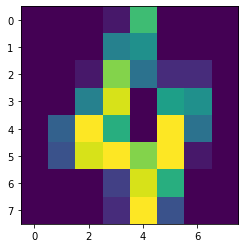

In [131]:
plt.imshow(digits.data)
plt.imshow(digits.images[4])